## Initial Setups

In [ ]:
!pip install -qU langchain\
    langchain-community\
    langchain-together\
    langchain-core\
    faiss-cpu\
    faiss-gpu\
    langgraph\
    sentence-transformers\
    gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 30.7

In [ ]:
import os
from dotenv import load_dotenv
from langchain_community.document_loaders.web_base import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_together import ChatTogether
from langchain_community.vectorstores import FAISS
from langchain.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import Literal
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from IPython.core.display import Markdown
from langchain_core.messages import HumanMessage, AIMessage
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate


In [ ]:
os.environ["TAVILY_API_KEY"] = "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"
os.environ["TOGETHER_API_KEY"] = "b8106c97edb2c98054f475c4c4bebde1042c67a8bab953566fa82a7201da01d3"

In [ ]:
# import os, getpass
# print("Enter your Tavily API Key")
# TAVILY_API_KEY = getpass.getpass()
# print("Enter your Together API Key")
# TOGETHER_API_KEY = getpass.getpass()


# os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
# os.environ["TOGETHER_API_KEY"] = TOGETHER_API_KEY

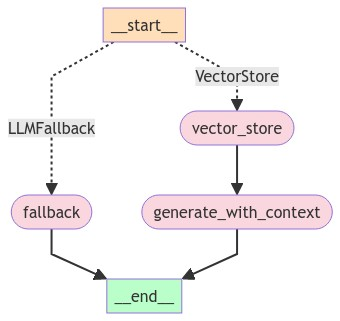

## Loading Data

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://stanford.edu/~jurafsky/slp3/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

pdf_links = []
for link in soup.find_all('a', href=True):
    href = link['href']
    if href.endswith('.pdf'):
        pdf_links.append(url + href if href.startswith('/') else href)


In [ ]:
pdf_links_main = []
for pdf in pdf_links:
    item = 'https://' + append_text + pdf
    pdf_links_main.append(item)
    print(item)

In [ ]:
urls = [
    'https://stanford.edu/~jurafsky/slp3/2.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/3.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/4.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/5.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/6.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/7.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/8.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/9.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/10.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/11.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/12.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/13.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/14.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/15.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/16.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/17.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/18.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/19.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/20.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/21.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/22.pdf' ,
    'https://stanford.edu/~jurafsky/slp3/23.pdf' ,
]

In [ ]:
loader = WebBaseLoader(urls , bs_get_text_kwargs={"strip": True})
docs = loader.load()

## Chunking, Vector Store and Retriever

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1024 , chunk_overlap = 64)
chunks = text_splitter.split_documents(docs)

embedding_function = HuggingFaceEmbeddings(show_progress = True, multi_process = True)
vector_store = FAISS.from_documents(documents=chunks, embedding = embedding_function)

retriever = vector_store.as_retriever(search_kwargs = {"k": 3})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Examples

In [ ]:
retriever.get_relevant_documents('Masked Language Model')

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/11.pdf'}, page_content=']: [��\x7f���\x1cp�Z���]_���\x14t?\x00��\x01*\x19S�X\\_�u��\x11�\t�Rз\x00\x19\x00"\n{F۸��\\�{��\x1d��虋\x04�+t�� �\x1a\\Sp�y&\x1dʒ�\x1d=���\\C \x08\x10��\x1c��w�w\x02\x83�8nf��\x1f\x195��/��@z�\x10�ۜI5��[0`%\x0c�\x01{�Z�M\x16�H}\x11`�6���E�"S^_��\x14x�#x\ra��D䛓q�`�K勠[q�\x16\x11^�\'��y\x1dO2p81E��r�{\\NC��^\x04}]Q\x0co��#b(������5/\\�\x07\x1e\x18�\x12L�~�ߗ=���V����g�T�\x16�U�p�\\u{\x7f��V[�q�s+i\u07bf\x0b<[eY�\x18��=���9l�\x14ձ�UG��m���\x1e��ː�\x0cU1��(\x07�qT��\x0eI9\x10V#aSo�\x0fM@�6��H`/\x03�d��ǰB\x02~oM\x08*�C��i\t��\x03Ԁ����@�@���R1y���Z��%\x11>�1\x0f�"�s�)��l\x17��u\x08Bx08}�q��B�z�`785�ſ\ue9679��\x0bTAꜾ\x1ay��?�Y6���1[�k7��cQ\x1bw��\n\x1d@ �IHh��ɻ������Z@>"�!��\x1fP3��������RX����T�O\x11p�\x1c\x00n�\x02�\x17��\x15BL�O`FzW��@\x12��\x00\t��弧\x7f8]iB}�l�>-[Mo��9\x14�\\\x0c!O\x01s\x7f͐w�ႩD�\x7f\r�K�]��\x06�p&T4�����Q�\x1b���M\'�\x1fL\x16���Qg�Fh��{\x1c�ɞ�m�\'b�\'%�\x0bl���}\x10o<�O��6�8�.l#B�Zb\

In [ ]:
retriever.get_relevant_documents('Token')

[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/21.pdf'}, page_content="0��i�9�6�\x01�\x01N�h�\x170\r`�otc�\x10?��.w�����˔��\x0e����5��N_���+���\x1f�/ug:�,\x06zB\x1b+�\x154\x0fz\x03�M��D�V��� H\x0e�<@)`*�\t�\x15`�G���9�Dtr��cW8x7}��'�q3y�;��"),
 Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/4.pdf'}, page_content="w�\x1c:3\x14�y��7t��oK�t��\x13}$\x16�ׅ+�/5HgNJ'��gNH'mκ��-v�luu���\x17�RCVC\x03�\x0b�-cz>�\x0fd��\\���άl١Fjg\x17*\x19� Z\x03EAo�\x1c�\x0bf�mn��1��O�-Ը�Thq�\x0c\x1fP�X�&�u\x13j���ى�n\x19�#\x00:\x14&CH\x0f�\x15_�::+P\x1d\r\x06\x15�A�������YU�\\Dm��ܪH�Sϓ�m�4WU��\x7f��\r�ک�4��\x0b���c�nyqӵ{�Y\x19\x0eK>~�pQk���\x1d��\u07bc���\x1d�\x17]�����PSZdw��ᒙm\x0b��]�>�\x1c�c�6�+\x05\\\x0bZ:n�us\x17Ϫ���"),
 Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/5.pdf'}, page_content='x���1\x01\x00\x00\x00\xa0��g\r\x0f�\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
retriever.get_relevant_documents('GPT')

[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/5.pdf'}, page_content='x���1\x01\x00\x00\x00\xa0��g\r\x0f�\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
retriever.get_relevant_documents('Data Structure')

[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/18.pdf'}, page_content='endstream\nendobj\n767 0 obj\n<<\n/Length1 1626\n/Length2 13887\n/Length3 0\n/Length 14734     \n/Filter /FlateDecode\n>>\nstream\nxڭ�ctf��&\x1a�bU�$\x15۶S��\x7f�|?�\x18랼��=�Z�D�J���6�@1\x1bkGZF:\x06.�����������\r�4�\x0c��\x1c�%g�#%\x15�\x07\x1a8��X�\x188\x02�\x00j@c�\x08�\x08��\x04`���#\x05\x08�غٛ��9\x02(T\x14�(��i�K�\t���\x7fj�<\x1d�M�\x01d_/�@K\x1b[+���W��kG% \x10�h\x06\x04��[\x02\x01�r�\x1a���\x00\nqY\x15�8�\x1aho`\t�w2�47\x02H�\x1b\x01�\x1d��\x00\x13\x1b{��\x0f\x00#\x1bkc�\x7fJs���%�\x000\x008�\x02�̿܀�F@�\x7fT4\x00[�������;��\x01`jo`���\x03G\x1b�������?\x00��&6�\x02dko�ea���'),
 Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/21.pdf'}, page_content='endstream\nendobj\n2358 0 obj\n<<\n/Length 2377 0 R\n/N 3\n/Alternate /DeviceRGB\n/Filter /FlateDecode\n>>\nstream\nx\x01��wTS�\x16�Ͻ7��\x12" %�\x1az\t �;H\x15\x04Q�I�P\x02��&vD\x05F\x14\x11)VdT�\x01G�"cE\x14\x0b��b�\t�\x10P��QD

In [ ]:
retriever.get_relevant_documents('president of France')

[Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/5.pdf'}, page_content="��\x17_Ll�2�W�;���\x1b?~|�����Ǿ9d�\x10�j m͜\x19����R��\x7fX�J�\x00\x00�f\x0c�A/�lC�\x0e�\x0f-\x7f��_�[�.�\x1f��\x7f\u07b4i��C�S��ĉ\x13�v\x14�c��G���\x0fN�f�XD۴i\x13�k�����o��vÆ\rK�,��</��&M�ķW999�^{�!�\x1c\x12��'�p�s5��V�\x08��\x15��j�2̝�B\x00\x00lK��\x17j�G\x1ey$>x�y�\x17-Z��\x0fx\x84\t�\x07\\�~�\x0f?����nʔ)B�Z\x16.\\��fd�ȑ��,2��F�\x1a\x15���g������O\u05ed[��Ϟ~��-[��\x07{��w_�bE���e\x1e\x04��"),
 Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/16.pdf'}, page_content='�\x14U��Z�S|\x007@�z�\x03�\x05\x1c���雮;<�Ǯ��\x1f�ق��`r\x18f\x0f�Y\x19�![�\u074b_�����<9G\x0fN�}�\ts�¼*\x0e��I��\x01��\x0f��8�Ă�\x1deg���\x1b\x16\x13`����8����^>�a\x06E���~V\x1aU�t�\x1cؿ9��l/�j\x17���\x0cή\x04��ܕi2uj���iyJ-�v]C�p�Ɇ�I\x06fk�JP\x08fR\x12�c�!�O˃�M��%h\x1a�ͤ�!H\x033�\x14d���t���}�A�ˌRߞ\x1c���\x00�'),
 Document(metadata={'source': 'https://stanford.edu/~jurafsky/slp3/21.pdf'}, page_content='V\x0eZL\x1d��\

# Hybrid Retriever **

In [ ]:
# from langchain.retrievers import BM25Retriever, HybridRetriever

lexical_retriever = BM25Retriever.from_documents(chunks)
semantic_retriever = vector_store.as_retriever(search_kwargs={"k": 3})
retriever = HybridRetriever(lexical_retriever=lexical_retriever, semantic_retriever=semantic_retriever)

class HybridRetriever(BaseRetriever):
    def __init__(self, lexical_retriever: BaseRetriever, semantic_retriever: VectorStoreRetriever, weight: float = 0.5):
        self.lexical_retriever = lexical_retriever
        self.semantic_retriever = semantic_retriever
        self.weight = weight

    def retrieve(self, query: str, top_k: int = 10) -> List[Document]:
        lexical_results = self.lexical_retriever.retrieve(query, top_k=top_k)
        semantic_results = self.semantic_retriever.retrieve(query, top_k=top_k)

        combined_scores = {}
        for result in lexical_results:
            combined_scores[result.page_content] = self.weight * result.metadata['score']
        for result in semantic_results:
            if result.page_content in combined_scores:
                combined_scores[result.page_content] += (1 - self.weight) * result.metadata['score']
            else:
                combined_scores[result.page_content] = (1 - self.weight) * result.metadata['score']


        sorted_results = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
        top_results = [Document(page_content=content) for content, score in sorted_results[:top_k]]

        return top_results

hybrid_retriever = HybridRetriever(lexical_retriever, semantic_retriever, weight=0.5)

query = "Language Model"
results = hybrid_retriever.retrieve(query, top_k=10)
for result in results:
    print(result.page_content)

ImportError: Could not import rank_bm25, please install with `pip install rank_bm25`.

In [ ]:
query = "Masked Language Model"

results = retriever.retrieve(query)
for result in results:
    print(result.page_content)

## Chains

### Prompt

In [ ]:
llm = ChatTogether(
      together_api_key = "b8106c97edb2c98054f475c4c4bebde1042c67a8bab953566fa82a7201da01d3",
      model = "meta-llama/Llama-3-70b-chat-hf",
      temperature = 0
    )

# Section 4

In [ ]:
llm = ChatTogether(model_name="meta-llama/Llama-3-70b-chat-hf", temperature=0)

prompt_template = ChatPromptTemplate(
    template="Determine the context of the following query: {query}\n"
             "Is it related to NLP, Computer Science, or neither?",
    input_variables=["query"]
)

def get_context_chain(query):
    prompt = prompt_template.format(query=query)
    response = llm(prompt)
    return response

query = "Explain the transformer architecture used in NLP."
context = get_context_chain(query)
print(f"Query: {query}")
print(f"Context: {context}")


KeyError: 'messages'

In [ ]:
from pprint import pprint

# raw_prompt = "Hi, I'm learning langchain to use it with LLMs and make awesome stuff!"
# raw_prompt = "سلام . من علاقه‌مند به یادگیری تکنولوژی اسپارک و هدوپ و کافکا برای یافتن شغل مهندس داده هستم."

raw_prompt2 = 'Hi my dear assistant ! What is NLP and What does it do in our lifes ?'
raw_prompt3 = 'What is NLP Reference book and What\'s the topics of this book ? please tell me in persian . thanks'
llm.invoke(raw_prompt3).content

'Here is the information you requested:\n\n**NLP Reference Book:**\n\nOne of the most popular and widely used NLP reference books is "Natural Language Processing (almost) from Scratch" by Collobert et al. (2011). However, there are many other excellent books on NLP that can serve as a reference, depending on your specific needs and goals.\n\n**Topics Covered in a Typical NLP Reference Book:**\n\nHere are some of the typical topics covered in a comprehensive NLP reference book:\n\n1. **Mathematical Foundations**: Linear Algebra, Calculus, Probability Theory, and Information Theory.\n2. **Language Modeling**: N-gram models, Markov models, and neural network-based language models.\n3. **Text Preprocessing**: Tokenization, Stopword removal, Stemming, Lemmatization, and Named Entity Recognition.\n4. **Word Embeddings**: Word2Vec, GloVe, and FastText.\n5. **Text Classification**: Sentiment Analysis, Spam Detection, and Topic Modeling.\n6. **Sequence Labeling**: Part-of-Speech Tagging, Named 

In [ ]:
prompt_template = "Hi, I'm learning {tool} to use it for classify of {query} in one of the 3 categories. \
Natural Language Processing , Computer Science or None of them."

prompt_chat_template = ChatPromptTemplate.from_template(
    template=prompt_template,
)

prompt_chat_template.invoke({
    "tool":"llama_index" ,
    "query" : "query"
})


KeyError: "Input to ChatPromptTemplate is missing variables {'query'}.  Expected: ['query', 'tool'] Received: ['tool']"

In [ ]:
prompt = prompt_chat_template.invoke({
    "tool":"llama_index"
})
llm.invoke(prompt).content

"That's great to hear! LlamaIndex is an amazing tool for building applications with Large Language Models (LLMs). It provides a simple and efficient way to index and query large language models, making it easier to integrate them into your projects.\n\nWhat kind of awesome stuff are you planning to build with LlamaIndex and LLMs? Are you looking to create a chatbot, a language-based game, or something entirely new?\n\nIf you have any questions or need help getting started with LlamaIndex, feel free to ask. I'm here to assist you!"

In [ ]:
chain = prompt_chat_template | llm

chain.invoke(
    {
    "tool":"llama_index"
  }
).content

"That's great to hear! LlamaIndex is an amazing tool for building applications with Large Language Models (LLMs). It provides a simple and efficient way to index and query large language models, making it easier to integrate them into your projects.\n\nWhat kind of awesome stuff are you planning to build with LlamaIndex and LLMs? Are you looking to create a chatbot, a language-based game, or something entirely new?\n\nIf you have any questions or need help getting started with LlamaIndex, feel free to ask! I'm here to assist you."

In [ ]:
# Set up a parser + inject instructions into the prompt template.

router_prompt_template = (
 "You are an expert in routing user queries to either a VectorStore or A Fallback Message\n"
 "Your VectorStore contains data about migraine, diabetes and malaria. if the given query is about one of these diseases, choose VectorStore"
 "If the query is not related to medical questions at all, DO NOT choose any tool."
 "Give me only and only the name of the tool you chose and nothing more. If there are no chose tool, give me back the string None"
 "{output_instructions}"
 "query: {query}"
)


prompt = ChatPromptTemplate.from_template(
    template=router_prompt_template,
)


### Pydantic Parser

In [ ]:
from typing import Literal

class ChosenTool(BaseModel):
    tool_name: Literal['None', "VectorStore"] = Field(description="the tool that was chosen by LLM in question routing stage")


question_router_parser = PydanticOutputParser(pydantic_object=ChosenTool)

question_router_parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"tool_name": {"title": "Tool Name", "description": "the tool that was chosen by LLM in question routing stage", "enum": ["None", "VectorStore"], "type": "string"}}, "required": ["tool_name"]}\n```'

In [ ]:
question_router = prompt | llm | question_router_parser

res = question_router.invoke({"query": "my name is vahid",
                                   "output_instructions": question_router_parser.get_format_instructions()
 })
res

ChosenTool(tool_name='None')

In [ ]:
test_chain = prompt | llm

test_chain.invoke({
    "query": "how dangerous is migraines?",
    "output_instructions": question_router_parser.get_format_instructions()
})

AIMessage(content='{"tool_name": "VectorStore"}', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 283, 'total_tokens': 292}, 'model_name': 'meta-llama/Llama-3-70b-chat-hf', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ae57ec5f-28e8-46b9-88c3-608ced1bee8f-0', usage_metadata={'input_tokens': 283, 'output_tokens': 9, 'total_tokens': 292})